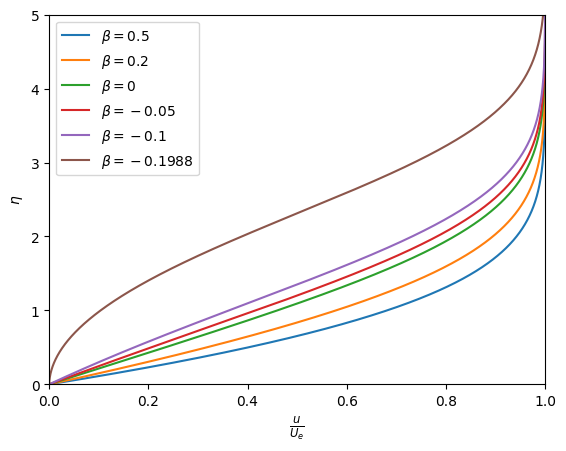

--- 2.127333164215088 seconds --- Faster than MatLab


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from tabulate import tabulate
import time

table_1, theta_over_g_x, c_f_Re_theta = [], [], []
start_time = time.time()
beta_list, eta = [0.5, 0.2, 0, -0.05, -0.1, -0.1988], np.linspace(0, 100, int(100 / 0.001))

falkner_skan_differential_equation = lambda eta, f, beta: [f[1], f[2], -f[0] * f[2] - beta * (1 - f[1] ** 2)]
secant = lambda x0, x1, f_1, f_0: x1 - (1 - f_1) * (x1 - x0) / ((1 - f_1) - (1 - f_0))
solve_falkner_skan_eqaution = lambda beta, guess: solve_ivp(falkner_skan_differential_equation, t_span=(0, 100), y0=[0, 0, guess], args=(beta,), t_eval=eta, method='BDF').y

for beta in beta_list:
    guess_1, guess_2 = 1, 0.1
    while abs(guess_2 - guess_1) > 1E-8:
        f_0, f_1 = solve_falkner_skan_eqaution(beta, guess_1)[1][-1], solve_falkner_skan_eqaution(beta, guess_2)[1][-1]
        guess_1, guess_2 = guess_2, secant(guess_1, guess_2, f_1, f_0)
    f, f_prime, f_double_prime = solve_ivp(falkner_skan_differential_equation, t_span=(0, 100), y0=[0, 0, guess_2], args=(beta,), t_eval=eta, method='BDF').y
    plt.plot(f_prime[:5001], eta[:5001], label=r"$\beta={}$".format(beta))
    theta_over_g_x = f_double_prime[0] / (1 + beta) - beta / (1 + beta) * (eta[-1] - f[-1])
    c_f_Re_theta = abs(2 * f_double_prime[0] * theta_over_g_x)
    H = theta_over_g_x**(-1) * (eta[-1] - f[-1])
    table_1.append([beta, theta_over_g_x, c_f_Re_theta, H])

plt.xlabel(r"$\frac{u}{U_e}$", fontsize="large"), plt.xlim(0, 1), plt.ylim(0, 5), plt.ylabel('$\eta$', fontsize="medium"), plt.legend(), plt.savefig('Project 2'), plt.show()
print("--- %s seconds --- Faster than MatLab" % (time.time() - start_time))

with open('Table_1.tex', 'w') as f:
    f.write(tabulate(table_1, headers=[r'$\beta$', r'$\frac{\theta}{g(x)}$', r'$c_f Re_{\theta}$', "$H$"], tablefmt='latex_raw'))


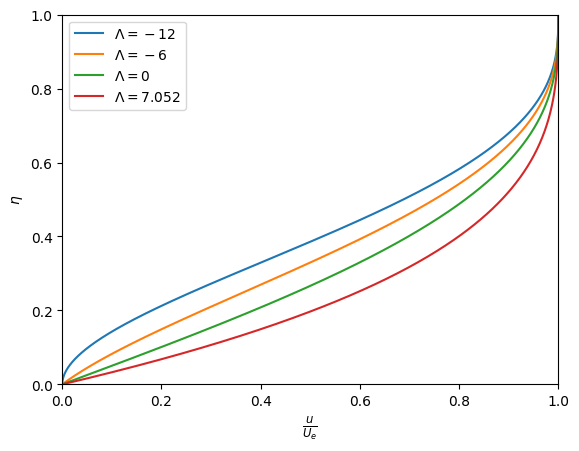

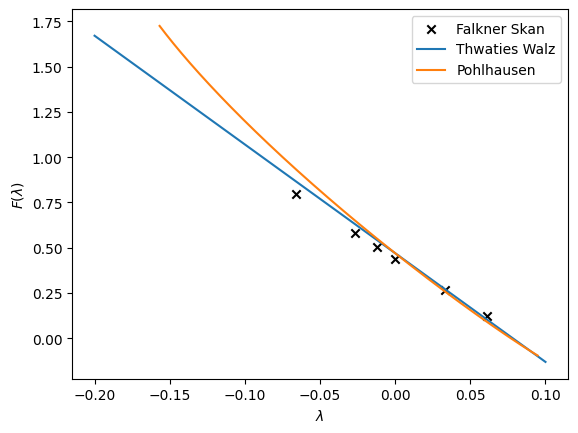

(Text(0.5, 25.0, '$\\lambda$'),
 Text(26.000000000000007, 0.5, '$F(\\lambda)$'),
 None,
 None)

In [29]:
capital_lambda = [-12, -6, 0, 7.052]
pohlhausen_profile = lambda capital_lambda, eta: 2*eta - 2*eta**3 + eta**4 + capital_lambda/6 * eta * (1-eta)**3
for i in capital_lambda:
    plt.plot(pohlhausen_profile(i, eta), eta, label=r"$\Lambda={}$".format(i))

plt.xlabel(r"$\frac{u}{U_e}$", fontsize="large"), plt.xlim(0, 1), plt.ylim(0, 1), plt.ylabel('$\eta$', fontsize="medium"), plt.legend(), plt.savefig('Pohlhausen'), plt.show()

lambda_range = np.linspace(-0.2, 0.1, 1000)
Thwaites_walz_profile = lambda lambda_value: 0.47 - 6*lambda_value

capital_lambda = np.linspace(-12, 12, 1000)
lambda_s = lambda capital_lambda: (37/315 - capital_lambda/945 - (capital_lambda**2)/9072)**2 * capital_lambda
H = lambda capital_lambda : (3/10 - capital_lambda/120) / (37/315 - capital_lambda/945 - (capital_lambda**2)/9072)

lambda_s = lambda_s(capital_lambda)
pohlhausen_profile = lambda capital_lambda: 2*(2+capital_lambda/6)*(37/315 - capital_lambda/945 - (capital_lambda**2)/9072) - 2*(2+H(capital_lambda)) * lambda_s

lambda_list, Falkner_skan_table = [], []
for index, element in enumerate(table_1):
    lambda_list.append(beta_list[index]*((table_1[index][1])**2))
    Falkner_skan_table.append(element[2]-2*(2+element[3])*lambda_list[-1])

plt.scatter(lambda_list, Falkner_skan_table, label=r"Falkner Skan", color='black', marker='x')
plt.plot(lambda_range, Thwaites_walz_profile(lambda_range), label=r"Thwaties Walz")
plt.plot(lambda_s, pohlhausen_profile(capital_lambda), label=r"Pohlhausen")
plt.xlabel("$\lambda$"), plt.ylabel("$F(\lambda)$"), plt.legend(), plt.savefig("Thwaites Walz"), plt.show()